 
<h1 style='background-color: #6495ED; font-family:newtimeroman; font-size:300%; text-align:center; border-radius: 15px 50px;' > STROKE PREDICTION USING ML </h1>

## IMPORTING LIBRARIES

In [1]:
import pandas as pd  #IMPORTING PANDAS
import numpy as np   #IMPORTING NUMPY
import matplotlib.pyplot as plt#IMPORTING MATHPLOT LIB FOR DATAVISULIZATION
%matplotlib inline
import seaborn as sns              #IMPORTING SEABORN FOR DATAVISULIZATION


import warnings                  
warnings.simplefilter("ignore")  #for ignoring warnings

In [2]:
!pip install imblearn

## Loading up the data

In [3]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")     
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,67,Female,17.0,0,0,No,Private,Urban,92.97,NaN,formerly smoked,0
1,77,Female,13.0,0,0,No,children,Rural,85.81,18.6,Unknown,0
2,84,Male,55.0,0,0,Yes,Private,Urban,89.17,31.5,never smoked,0
3,91,Female,42.0,0,0,No,Private,Urban,98.53,18.5,never smoked,0
4,99,Female,31.0,0,0,No,Private,Urban,108.89,52.3,Unknown,0


In [4]:
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,67,Female,17.0,0,0,No,Private,Urban,92.97,NaN,formerly smoked,0
1,77,Female,13.0,0,0,No,children,Rural,85.81,18.6,Unknown,0
2,84,Male,55.0,0,0,Yes,Private,Urban,89.17,31.5,never smoked,0
3,91,Female,42.0,0,0,No,Private,Urban,98.53,18.5,never smoked,0
4,99,Female,31.0,0,0,No,Private,Urban,108.89,52.3,Unknown,0
5,121,Female,38.0,0,0,Yes,Private,Urban,91.44,NaN,Unknown,0
6,129,Female,24.0,0,0,No,Private,Urban,97.55,26.2,never smoked,0
7,132,Female,80.0,0,0,Yes,Govt_job,Urban,84.86,NaN,Unknown,0
8,156,Female,33.0,0,0,Yes,Private,Rural,86.97,42.2,never smoked,0
9,163,Female,20.0,0,0,No,Private,Rural,94.67,28.8,Unknown,0


In [5]:
df.columns   # NO OF COLUMNS 

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

## DROPPING UNWANTED COLUMNS

In [6]:
df.drop("id", axis=1, inplace=True)  # Dropping column 'id' as it can cause unwanted correlation. it is unique identifier

In [7]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Female,17.0,0,0,No,Private,Urban,92.97,NaN,formerly smoked,0
1,Female,13.0,0,0,No,children,Rural,85.81,18.6,Unknown,0
2,Male,55.0,0,0,Yes,Private,Urban,89.17,31.5,never smoked,0
3,Female,42.0,0,0,No,Private,Urban,98.53,18.5,never smoked,0
4,Female,31.0,0,0,No,Private,Urban,108.89,52.3,Unknown,0


In [8]:
df.shape   #for number of columns and rows 

(5110, 11)

In [9]:
print("THE NUMBER OF ROWS/RECORDS : 5110")

print("THE NUMBER OF COLUMNS/ATTRIBUTES : 11")

THE NUMBER OF ROWS/RECORDS : 5110
THE NUMBER OF COLUMNS/ATTRIBUTES : 11


In [10]:
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [11]:
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


## VARIABLE DESCRIPTION

* id: unique identifier  (already Dropped ) 
* gender: "Male", "Female" or "Other"
* age: age of the patient
* hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
* heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
* ever_married: "No" or "Yes"
* work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
* Residence_type: "Rural" or "Urban"
* avg_glucose_level: average glucose level in blood
* bmi: body mass index
* smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
* stroke: 1 if the patient had a stroke or 0 if not

## CHECKING FOR NULL VALUES  (data preprocessing)

In [12]:
df.isna()   #give true if there is null value viceversa

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,False,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
5105,False,False,False,False,False,False,False,False,False,False,False
5106,False,False,False,False,False,False,False,False,False,False,False
5107,False,False,False,False,False,False,False,False,False,False,False
5108,False,False,False,False,False,False,False,False,False,False,False


In [13]:



df.isna().sum()   #gives count of null values in each column

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [14]:
#PRINTING ALL THE NULL VALUES
print("total no of null values in healthcare-dataset-stroke-data-------->",df.isnull().sum().sum())

total no of null values in healthcare-dataset-stroke-data--------> 201


## FILLING THE NULL VALUES

In [15]:
#from sklearn.impute import SimpleImputer

In [16]:
from sklearn.impute import KNNImputer

In [17]:
imputer = KNNImputer(n_neighbors = 5)                          # imputing  the null values in BMI
df['bmi'] = imputer.fit_transform(df[['bmi']])

In [18]:
df.isna().sum()     #checking for null values again

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [19]:
#PRINTING ALL THE NULL VALUES
print("total no of null values in healthcare-dataset-stroke-data-------->",df.isnull().sum().sum())   

total no of null values in healthcare-dataset-stroke-data--------> 0


## Exploratory Data Analysis

### CHECKING NO OF STROKE OCCURANCE IN DATASET

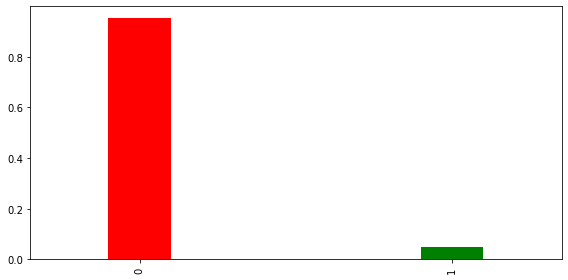

In [20]:
fig, axes = plt.subplots(figsize=(8, 4))
df['stroke'].value_counts(normalize=True).plot.bar(width=0.2, color=('red','green'))

plt.tight_layout()
plt.show()

### CATEGORICAL COLUMNS

In [21]:
df.gender.value_counts()    

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

<AxesSubplot:xlabel='gender', ylabel='count'>

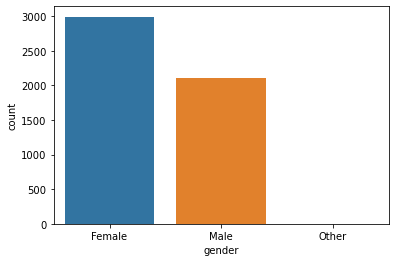

In [22]:
sns.countplot(df['gender'])   # graph for gender

<AxesSubplot:xlabel='ever_married', ylabel='count'>

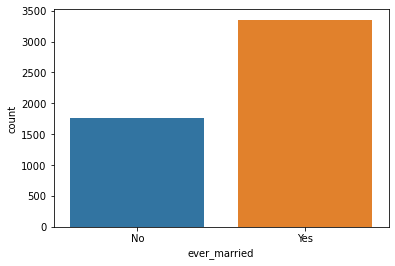

In [23]:
sns.countplot(df['ever_married'])

<AxesSubplot:xlabel='work_type', ylabel='count'>

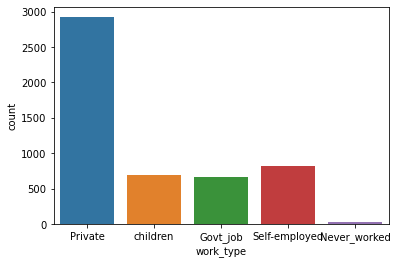

In [24]:
sns.countplot(df['work_type'])

<AxesSubplot:xlabel='Residence_type', ylabel='count'>

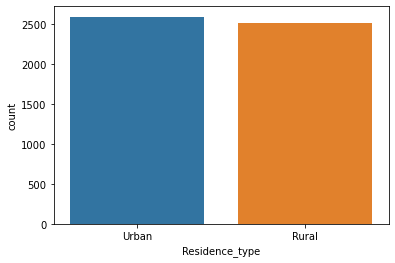

In [25]:
sns.countplot(df['Residence_type'])

<AxesSubplot:xlabel='Residence_type', ylabel='count'>

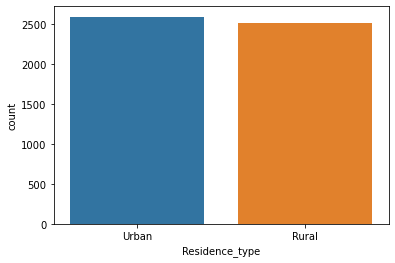

In [26]:
sns.countplot(df['Residence_type'])

In [27]:
cols = df[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']]
cols.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi
0,17.0,0,0,92.97,28.893237
1,13.0,0,0,85.81,18.600000
2,55.0,0,0,89.17,31.500000
3,42.0,0,0,98.53,18.500000
4,31.0,0,0,108.89,52.300000


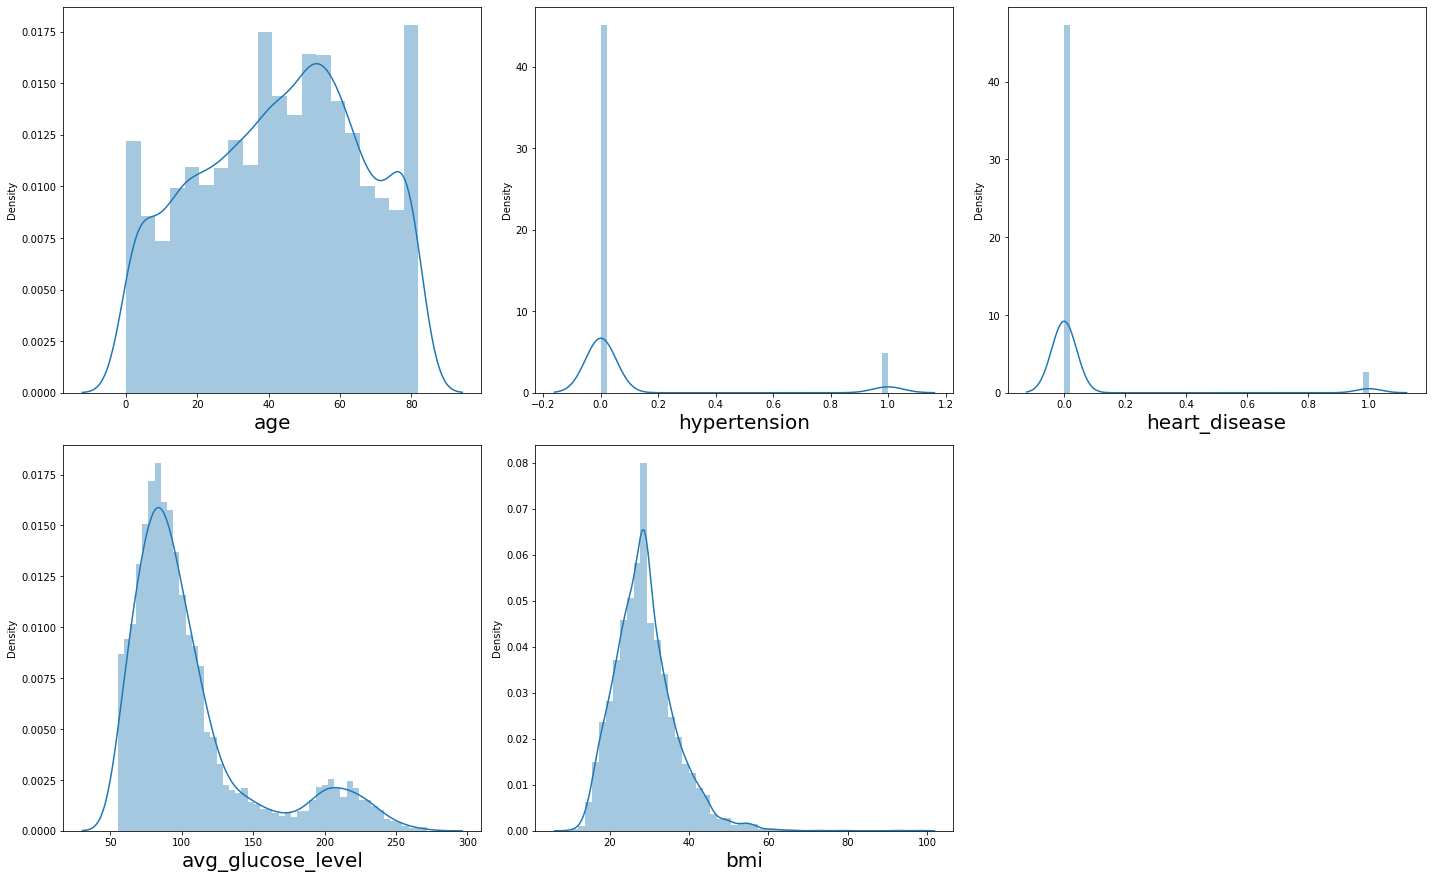

In [28]:
# lets see how data is distributed for every column
import seaborn as sns
plt.figure(figsize=(20,30), facecolor='white')
plotnumber=1

for column in cols:
    if plotnumber<=15:
        ax = plt.subplot(5,3,plotnumber)
        sns.distplot(cols[column])
        plt.xlabel(column, fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

## Handle categorical columns

In [29]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Female,17.0,0,0,No,Private,Urban,92.97,28.893237,formerly smoked,0
1,Female,13.0,0,0,No,children,Rural,85.81,18.600000,Unknown,0
2,Male,55.0,0,0,Yes,Private,Urban,89.17,31.500000,never smoked,0
3,Female,42.0,0,0,No,Private,Urban,98.53,18.500000,never smoked,0
4,Female,31.0,0,0,No,Private,Urban,108.89,52.300000,Unknown,0


In [30]:
df.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

## LABEL ENCODING 

In [31]:
gender = pd.get_dummies(df[['gender']], drop_first= True)
gender.head()

,gender_Male,gender_Other
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [32]:
df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [33]:
df.smoking_status.unique()

array(['formerly smoked', 'Unknown', 'never smoked', 'smokes'],
      dtype=object)

In [34]:
married = pd.get_dummies(df[['ever_married']], drop_first= True)
married.head()

,ever_married_Yes
0,0
1,0
2,1
3,0
4,0


In [35]:
df.work_type.value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [36]:
work = pd.get_dummies(df[['work_type']], drop_first= True)
work.head()

,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,0,1,0,0
1,0,0,0,1
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


In [37]:
residence = pd.get_dummies(df[['Residence_type']], drop_first= True)
residence.head()

,Residence_type_Urban
0,1
1,0
2,1
3,1
4,1


In [38]:
smoking = pd.get_dummies(df[['smoking_status']], drop_first= True)
smoking.head()

,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,0,0
1,0,0,0
2,0,1,0
3,0,1,0
4,0,0,0


In [39]:
data = pd.concat([df, gender, married, work, residence, smoking], axis = 1)
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,...,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,Female,17.0,0,0,No,Private,Urban,92.97,28.893237,formerly smoked,...,0,0,0,1,0,0,1,1,0,0
1,Female,13.0,0,0,No,children,Rural,85.81,18.600000,Unknown,...,0,0,0,0,0,1,0,0,0,0
2,Male,55.0,0,0,Yes,Private,Urban,89.17,31.500000,never smoked,...,0,1,0,1,0,0,1,0,1,0
3,Female,42.0,0,0,No,Private,Urban,98.53,18.500000,never smoked,...,0,0,0,1,0,0,1,0,1,0
4,Female,31.0,0,0,No,Private,Urban,108.89,52.300000,Unknown,...,0,0,0,1,0,0,1,0,0,0


In [40]:
categorical_features = ['gender', 'ever_married', 'work_type', 'Residence_type','smoking_status']

In [41]:
data = data.drop(columns=categorical_features, axis=1)
data.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,17.0,0,0,92.97,28.893237,0,0,0,0,0,1,0,0,1,1,0,0
1,13.0,0,0,85.81,18.600000,0,0,0,0,0,0,0,1,0,0,0,0
2,55.0,0,0,89.17,31.500000,0,1,0,1,0,1,0,0,1,0,1,0
3,42.0,0,0,98.53,18.500000,0,0,0,0,0,1,0,0,1,0,1,0
4,31.0,0,0,108.89,52.300000,0,0,0,0,0,1,0,0,1,0,0,0


In [42]:
#data = data.drop(columns="id" , axis=1)
#data.head()

In [43]:
data.shape

(5110, 17)

In [45]:
data.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke', 'gender_Male', 'gender_Other', 'ever_married_Yes',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Urban',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object')

## Split dataset into train and test

In [46]:
data.head(10)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,17.0,0,0,92.97,28.893237,0,0,0,0,0,1,0,0,1,1,0,0
1,13.0,0,0,85.81,18.600000,0,0,0,0,0,0,0,1,0,0,0,0
2,55.0,0,0,89.17,31.500000,0,1,0,1,0,1,0,0,1,0,1,0
3,42.0,0,0,98.53,18.500000,0,0,0,0,0,1,0,0,1,0,1,0
4,31.0,0,0,108.89,52.300000,0,0,0,0,0,1,0,0,1,0,0,0
5,38.0,0,0,91.44,28.893237,0,0,0,1,0,1,0,0,1,0,0,0
6,24.0,0,0,97.55,26.200000,0,0,0,0,0,1,0,0,1,0,1,0
7,80.0,0,0,84.86,28.893237,0,0,0,1,0,0,0,0,1,0,0,0
8,33.0,0,0,86.97,42.200000,0,0,0,1,0,1,0,0,0,0,1,0
9,20.0,0,0,94.67,28.800000,0,0,0,0,0,1,0,0,0,0,0,0


In [47]:
x = data.drop("stroke", axis=1)
x.head()                                  #dropping target variable

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,17.0,0,0,92.97,28.893237,0,0,0,0,1,0,0,1,1,0,0
1,13.0,0,0,85.81,18.600000,0,0,0,0,0,0,1,0,0,0,0
2,55.0,0,0,89.17,31.500000,1,0,1,0,1,0,0,1,0,1,0
3,42.0,0,0,98.53,18.500000,0,0,0,0,1,0,0,1,0,1,0
4,31.0,0,0,108.89,52.300000,0,0,0,0,1,0,0,1,0,0,0


In [48]:
y = data[['stroke']]
y.head()                               #only target variable

,stroke
0,0
1,0
2,0
3,0
4,0


In [49]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()

In [50]:
x,y=smote.fit_resample(x,y)

## Scaling the data 

In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [52]:
x

array([[-1.71683986, -0.30511714, -0.22914237, ...,  2.57276549,
        -0.60690375, -0.33215109],
       [-1.89813737, -0.30511714, -0.22914237, ..., -0.38868681,
        -0.60690375, -0.33215109],
       [ 0.00548648, -0.30511714, -0.22914237, ..., -0.38868681,
         1.64770773, -0.33215109],
       ...,
       [ 0.92766942, -0.30511714, -0.22914237, ..., -0.38868681,
        -0.60690375, -0.33215109],
       [-0.37150356, -0.30511714, -0.22914237, ..., -0.38868681,
         1.64770773, -0.33215109],
       [ 1.04991437, -0.30511714, -0.22914237, ..., -0.38868681,
        -0.60690375, -0.33215109]])

## SPILITTING THE DATA

In [53]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)     

In [54]:
x_train

array([[-1.35424484, -0.30511714, -0.22914237, ..., -0.38868681,
        -0.60690375, -0.33215109],
       [ 1.13859591, -0.30511714, -0.22914237, ..., -0.38868681,
         1.64770773, -0.33215109],
       [ 0.22746271, -0.30511714,  4.36409909, ..., -0.38868681,
        -0.60690375, -0.33215109],
       ...,
       [-0.65164016, -0.30511714, -0.22914237, ..., -0.38868681,
        -0.60690375, -0.33215109],
       [ 1.09327154, -0.30511714, -0.22914237, ..., -0.38868681,
        -0.60690375, -0.33215109],
       [-0.21111422, -0.30511714, -0.22914237, ..., -0.38868681,
        -0.60690375, -0.33215109]])

In [55]:
y_train

,stroke
5011,0
6550,1
7395,1
847,0
938,0
...,...
5734,1
5191,1
5390,1
860,1


In [56]:
x_test

array([[ 0.41340588,  3.27742977, -0.22914237, ..., -0.38868681,
         1.64770773, -0.33215109],
       [-2.09200806, -0.30511714, -0.22914237, ..., -0.38868681,
        -0.60690375, -0.33215109],
       [-2.39670552, -0.30511714, -0.22914237, ..., -0.38868681,
        -0.60690375, -0.33215109],
       ...,
       [ 1.04652599, -0.30511714, -0.22914237, ..., -0.38868681,
        -0.60690375, -0.33215109],
       [-1.71683986, -0.30511714, -0.22914237, ..., -0.38868681,
        -0.60690375, -0.33215109],
       [-2.26073239, -0.30511714, -0.22914237, ..., -0.38868681,
        -0.60690375, -0.33215109]])

In [57]:
y_test

,stroke
1145,0
8501,1
3903,0
1608,0
9139,1
...,...
7736,1
7885,1
6759,1
3774,0


In [58]:
print(len(x_train), len(x_test))
#print(y_train)
print("---------------------------")     #print the how many no of training and testing data is there ....
print(len(y_train), len(y_test))

6513 3209
---------------------------
6513 3209


## MODEL TRAINING 

### LOGISTIC REGRESSION

In [59]:
from sklearn.linear_model import LogisticRegression   #importing the logistic regression algorithm
lr = LogisticRegression()    #model
lr.fit(x_train, y_train)    #fitting the data 

LogisticRegression()

In [60]:
LogisticRegressionScore = lr.score(x_test, y_test)
#print("Accuracy Score of Logistic Regression",LogisticRegressionScore)
print("Accuracy obtained by Logistic Regression model:",LogisticRegressionScore*100)

Accuracy obtained by Logistic Regression model: 85.32253038329698


findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


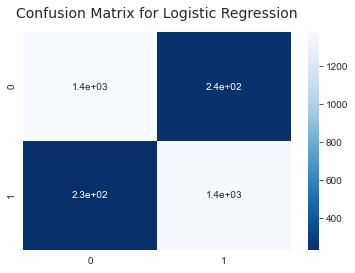

In [61]:
# Having a look at the confusion matrix for Logistic Regression

from sklearn.metrics import confusion_matrix, classification_report
sns.set_style("white")
y_pred_lr = lr.predict(x_test)
cf_matrix = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cf_matrix, annot=True, cmap="Blues_r")
plt.title("Confusion Matrix for Logistic Regression", fontsize=14, fontname="Helvetica", y=1.04);

In [62]:
# Having  the classification report of Logistic Regression

from sklearn import metrics                                  #metrics
print(metrics.classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85      1618
           1       0.85      0.85      0.85      1591

    accuracy                           0.85      3209
   macro avg       0.85      0.85      0.85      3209
weighted avg       0.85      0.85      0.85      3209



## LINEAR REGRESSION

In [63]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [64]:
LinearRegressionScore = lr.score(x_test, y_test)
print("Accuracy obtained by Logistic Regression model:",LinearRegressionScore*100)

Accuracy obtained by Logistic Regression model: 56.40072513604887


In [65]:
# WORST PERFORMANCE BY LINEAR REGRESSION

## KNN  

In [66]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [67]:
KNeighborsClassifierScore = knn.score(x_test, y_test)
print("Accuracy obtained by K Neighbors Classifier :", KNeighborsClassifierScore*100)

Accuracy obtained by K Neighbors Classifier : 90.43315674665004


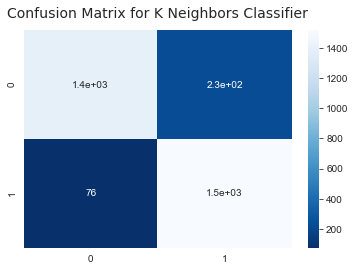

In [68]:
# Confustion Matrix 

y_pred_knn = knn.predict(x_test)
cf_matrix = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cf_matrix, annot=True, cmap="Blues_r")
plt.title("Confusion Matrix for K Neighbors Classifier", fontsize=14, fontname="Helvetica", y=1.03);

In [69]:
print(metrics.classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.95      0.86      0.90      1618
           1       0.87      0.95      0.91      1591

    accuracy                           0.90      3209
   macro avg       0.91      0.90      0.90      3209
weighted avg       0.91      0.90      0.90      3209



## Decision Tree Classifier

In [70]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [71]:
DecisionTreeClassifierScore = tree.score(x_test,y_test)
print("Accuracy obtained by Decision Tree Classifier :", DecisionTreeClassifierScore*100)

Accuracy obtained by Decision Tree Classifier : 91.30570271112497


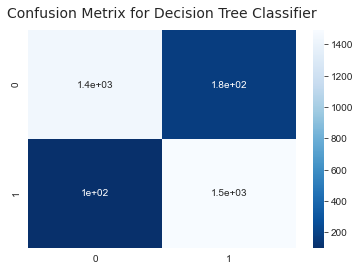

In [72]:
y_pred_tree = tree.predict(x_test)
cf_matrix = confusion_matrix(y_test, y_pred_tree)
sns.heatmap(cf_matrix, annot=True, cmap="Blues_r")
plt.title("Confusion Metrix for Decision Tree Classifier", fontsize=14, fontname="Helvetica", y=1.03);

In [73]:
print(metrics.classification_report(y_test, y_pred_tree));

              precision    recall  f1-score   support

           0       0.93      0.89      0.91      1618
           1       0.89      0.94      0.91      1591

    accuracy                           0.91      3209
   macro avg       0.91      0.91      0.91      3209
weighted avg       0.91      0.91      0.91      3209



##  SGD

In [74]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(x_train, y_train)

SGDClassifier()

In [75]:
sgdscore=sgd.score(x_train, y_train)
print("Accuracy obtained by sgd Classifier model:",sgdscore*100)

Accuracy obtained by sgd Classifier model: 84.93781667434362


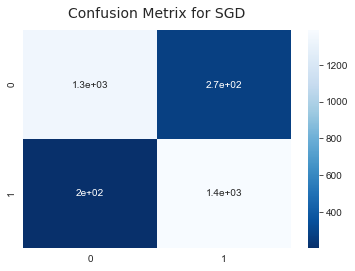

In [76]:
y_pred_SGD = sgd.predict(x_test)
cf_matrix = confusion_matrix(y_test, y_pred_SGD)
sns.heatmap(cf_matrix, annot=True, cmap="Blues_r")
plt.title("Confusion Metrix for SGD", fontsize=14, fontname="Helvetica", y=1.03);

In [77]:
print(metrics.classification_report(y_test, y_pred_SGD));

              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1618
           1       0.84      0.87      0.85      1591

    accuracy                           0.85      3209
   macro avg       0.85      0.85      0.85      3209
weighted avg       0.85      0.85      0.85      3209



## RANDOM FOREST CLASSIFIER

In [78]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [79]:
RandomForestClassifierScore = rfc.score(x_test,y_test)
print("Accuarcy obtained by Random Forest Classifier :", RandomForestClassifierScore*100)

Accuarcy obtained by Random Forest Classifier : 94.39077594266126


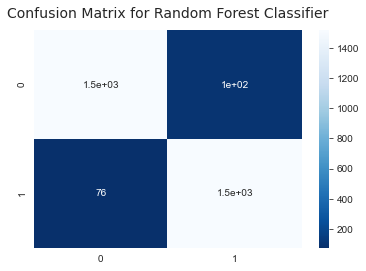

In [80]:
# Confusion Matrix of Random Forest Classifier

y_pred_rfc = rfc.predict(x_test)
cf_matrix = confusion_matrix(y_test, y_pred_rfc)
sns.heatmap(cf_matrix, annot=True, cmap="Blues_r")
plt.title("Confusion Matrix for Random Forest Classifier", fontsize=14, fontname="Helvetica", y=1.03);

In [81]:
print(metrics.classification_report(y_test, y_pred_rfc));

              precision    recall  f1-score   support

           0       0.95      0.94      0.94      1618
           1       0.94      0.95      0.94      1591

    accuracy                           0.94      3209
   macro avg       0.94      0.94      0.94      3209
weighted avg       0.94      0.94      0.94      3209



## SVM

In [82]:
from sklearn.svm import SVC
sv=SVC()
sv.fit(x_train,y_train)

SVC()

In [83]:
SVM = sv.score(x_test,y_test)
print("Accuarcy obtained by Random Forest Classifier :", SVM*100)

Accuarcy obtained by Random Forest Classifier : 89.84107198504206


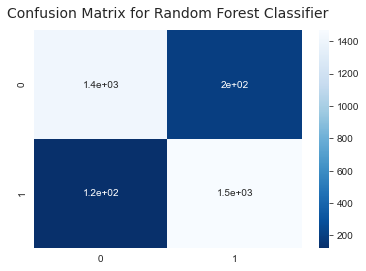

In [84]:
# Confusion Matrix of Random Forest Classifier

y_pred_svm = sv.predict(x_test)
cf_matrix = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cf_matrix, annot=True, cmap="Blues_r")
plt.title("Confusion Matrix for Random Forest Classifier", fontsize=14, fontname="Helvetica", y=1.03);

In [85]:
print(metrics.classification_report(y_test, y_pred_svm));

              precision    recall  f1-score   support

           0       0.92      0.88      0.90      1618
           1       0.88      0.92      0.90      1591

    accuracy                           0.90      3209
   macro avg       0.90      0.90      0.90      3209
weighted avg       0.90      0.90      0.90      3209



## ADABOOST

In [86]:

from sklearn.ensemble import AdaBoostClassifier
Ada = AdaBoostClassifier(n_estimators=2000, random_state = 0)
Ada.fit(x_train, y_train)
    
  

AdaBoostClassifier(n_estimators=2000, random_state=0)

In [87]:
  print('AdaBoost Classifier Training Accuracy:', Ada.score(x_train, y_train)*100)

AdaBoost Classifier Training Accuracy: 92.78366344234608


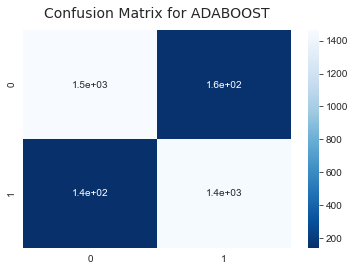

In [88]:
# Confusion Matrix of ADABOOST

y_pred_ada = Ada.predict(x_test)
cf_matrix = confusion_matrix(y_test, y_pred_ada)
sns.heatmap(cf_matrix, annot=True, cmap="Blues_r")
plt.title("Confusion Matrix for ADABOOST", fontsize=14, fontname="Helvetica", y=1.03);

In [89]:
print(metrics.classification_report(y_test, y_pred_ada));

              precision    recall  f1-score   support

           0       0.91      0.90      0.91      1618
           1       0.90      0.91      0.91      1591

    accuracy                           0.91      3209
   macro avg       0.91      0.91      0.91      3209
weighted avg       0.91      0.91      0.91      3209



## GAUSSIAN NB

In [90]:
from sklearn.naive_bayes import GaussianNB
gauss = GaussianNB()
gauss.fit(x_train, y_train)


GaussianNB()

In [91]:
  print('GaussianNB  Training Accuracy:', gauss.score(x_train, y_train)*100)

GaussianNB  Training Accuracy: 57.362198679563946


''

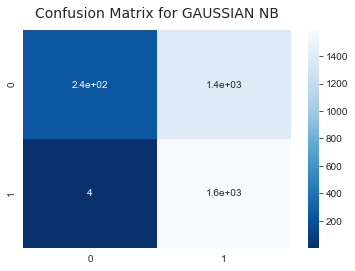

In [92]:
# Confusion Matrix of GAUSSIAN NB

y_pred_gauss = gauss.predict(x_test)
cf_matrix = confusion_matrix(y_test, y_pred_gauss)
sns.heatmap(cf_matrix, annot=True, cmap="Blues_r")
plt.title("Confusion Matrix for GAUSSIAN NB", fontsize=14, fontname="Helvetica", y=1.03);

In [93]:
print(metrics.classification_report(y_test, y_pred_gauss));

              precision    recall  f1-score   support

           0       0.98      0.15      0.25      1618
           1       0.53      1.00      0.70      1591

    accuracy                           0.57      3209
   macro avg       0.76      0.57      0.47      3209
weighted avg       0.76      0.57      0.47      3209



In [94]:
# WORST PERFORMANCE OF THE NB ALGORITHM

## XGBOOST

In [95]:
! pip install xgboost

In [122]:
from xgboost import XGBClassifier
xgb = XGBClassifier(base_score=0.5,booster='gbtree', max_depth=5)
xgb.fit(x_train,y_train)


[21:24:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [123]:
  print('XGB Accuracy:', xgb.score(x_train, y_train)*100)

XGB Accuracy: 98.90987256256717


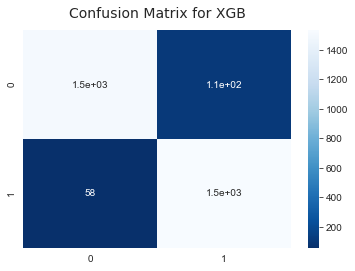

In [125]:
# Confusion Matrix of XGB

y_pred_xgb= xgb.predict(x_test)
cf_matrix = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cf_matrix, annot=True, cmap="Blues_r")
plt.title("Confusion Matrix for XGB", fontsize=14, fontname="Helvetica", y=1.03);

In [126]:
print(metrics.classification_report(y_test, y_pred_xgb));

              precision    recall  f1-score   support

           0       0.96      0.93      0.95      1618
           1       0.93      0.96      0.95      1591

    accuracy                           0.95      3209
   macro avg       0.95      0.95      0.95      3209
weighted avg       0.95      0.95      0.95      3209



## COMPARSION OF ALGORITHMS

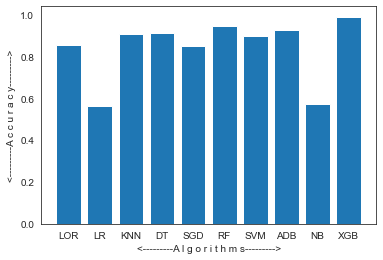

In [127]:
plt.bar(['LOR','LR','KNN','DT','SGD','RF','SVM','ADB',"NB","XGB"],[LogisticRegressionScore,LinearRegressionScore,KNeighborsClassifierScore,DecisionTreeClassifierScore,sgdscore,RandomForestClassifierScore,SVM, Ada.score(x_train, y_train),gauss.score(x_train, y_train),xgb.score(x_train, y_train)])
plt.xlabel("<---------A l g o r i t h m s--------->")
plt.ylabel("<---------A c c u r a c y--------->")
plt.show()

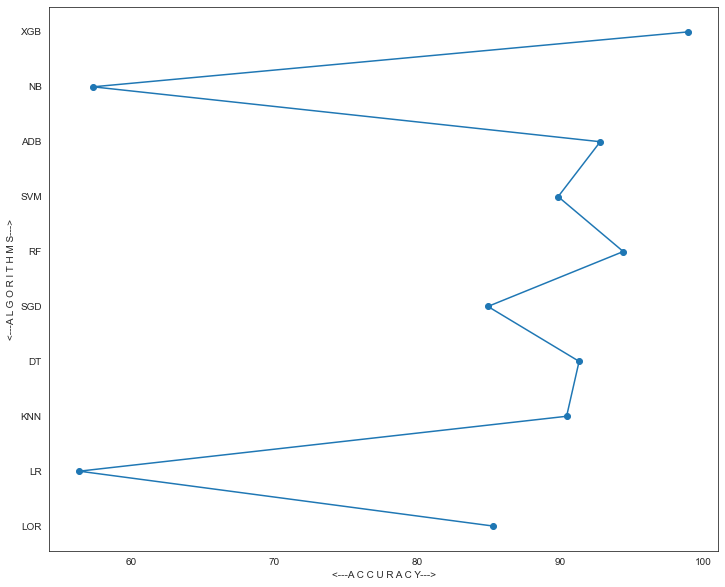

In [135]:
x = np.array(['LOR','LR','KNN','DT','SGD','RF','SVM','ADB',"NB","XGB"])  # X-axis points
y = np.array([LogisticRegressionScore*100,LinearRegressionScore*100,KNeighborsClassifierScore*100,DecisionTreeClassifierScore*100,sgdscore*100,RandomForestClassifierScore*100,SVM*100, Ada.score(x_train, y_train)*100,gauss.score(x_train, y_train)*100,xgb.score(x_train, y_train)*100])  # Y-axis points
plt.figure(figsize=(12,10))
plt.ylabel("<---A L G O R I T H M S--->")
plt.xlabel("<---A C C U R A C Y--->")
plt.plot(y,x,marker="o")  # Plot the chart
plt.show()  # display

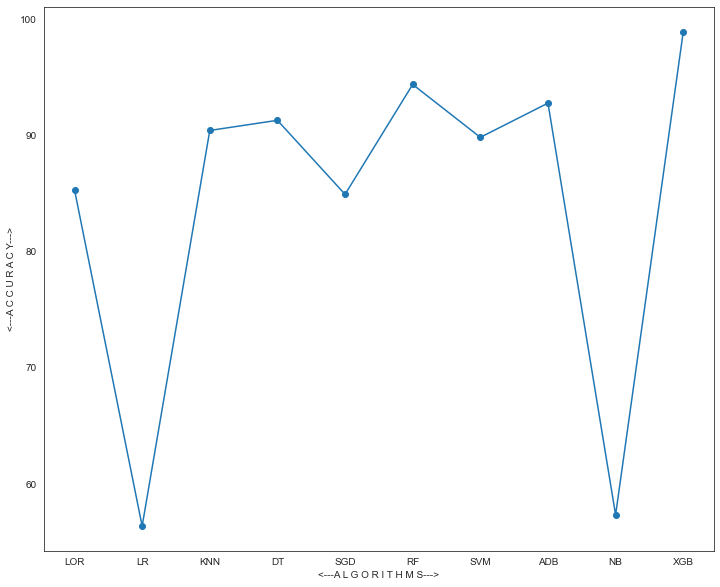

In [134]:
x = np.array(['LOR','LR','KNN','DT','SGD','RF','SVM','ADB',"NB","XGB"])  # X-axis points
y = np.array([LogisticRegressionScore*100,LinearRegressionScore*100,KNeighborsClassifierScore*100,DecisionTreeClassifierScore*100,sgdscore*100,RandomForestClassifierScore*100,SVM*100, Ada.score(x_train, y_train)*100,gauss.score(x_train, y_train)*100,xgb.score(x_train, y_train)*100])  # Y-axis points
plt.figure(figsize=(12,10))
plt.xlabel("<---A L G O R I T H M S--->")
plt.ylabel("<---A C C U R A C Y--->")
plt.plot(x,y,marker="o")  # Plot the chart
plt.show()  # display